In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [65]:
%matplotlib inline

In [3]:
heartdata = pd.read_csv('./Datasets/Heart.csv', index_col = 0)

In [4]:
# heartdata = heartdata.drop(['ChestPain', 'Thal'], axis = 1)

In [5]:
heartdata.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [6]:
data = heartdata[['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']]

In [7]:
target = heartdata[['AHD']]

In [8]:
imp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

In [9]:
imp.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [10]:
data = pd.DataFrame(data = imp.transform(data), columns = data.columns, index = data.index)

In [11]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
1,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0
2,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0
3,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0
4,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0
5,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0


In [12]:
# dummy_1 = pd.get_dummies(heartdata['ChestPain'])
# dummy_2 = pd.get_dummies(heartdata['Thal'])

In [13]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
Age          303 non-null int64
Sex          303 non-null int64
ChestPain    303 non-null object
RestBP       303 non-null int64
Chol         303 non-null int64
Fbs          303 non-null int64
RestECG      303 non-null int64
MaxHR        303 non-null int64
ExAng        303 non-null int64
Oldpeak      303 non-null float64
Slope        303 non-null int64
Ca           299 non-null float64
Thal         301 non-null object
AHD          303 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [14]:
le = LabelEncoder()

In [15]:
heartdata.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [16]:
thal = heartdata[['Thal']]
chestpain = heartdata[['ChestPain']]

In [17]:
chestpain.head(10)

,ChestPain
1,typical
2,asymptomatic
3,asymptomatic
4,nonanginal
5,nontypical
6,nontypical
7,asymptomatic
8,asymptomatic
9,asymptomatic
10,asymptomatic


In [18]:
n = 1

for x in chestpain['ChestPain']:
    if x == 'typical':
        chestpain['ChestPain'][n] = 1
    elif x == 'asymptomatic':
        chestpain['ChestPain'][n] = 2
    elif x == 'nonanginal':
        chestpain['ChestPain'][n] = 3
    else:
        chestpain['ChestPain'][n] = 4
    n += 1

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
chestpain.head()

,ChestPain
1,1
2,2
3,2
4,3
5,4


In [20]:
thal.head()

,Thal
1,fixed
2,normal
3,reversable
4,normal
5,normal


In [21]:
n = 1

for x in target['AHD']:
    if x == 'No':
        target['AHD'][n] = 0
    else:
        target['AHD'][n] = 1
    n = n + 1


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
n = 1

for x in thal['Thal']:
    if x == 'fixed':
        thal['Thal'][n] = 1
    elif x == 'normal':
        thal['Thal'][n] = 2
    elif x == 'reversable':
        thal['Thal'][n] = 3
    else:
        thal['Thal'][n] = 2
    n += 1

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
# thal

In [24]:
data.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
1,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0
2,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0
3,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0
4,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0
5,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0


In [25]:
newdata = pd.concat([data, thal], axis = 1)

In [26]:
newdata = pd.concat([newdata, chestpain], axis = 1)

In [27]:
newdata.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,ChestPain
1,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,1,1
2,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2,2
3,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,3,2
4,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,2,3
5,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,2,4


In [28]:
newdataplt = pd.concat([newdata, target], axis = 1)

In [29]:
newdataplt.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,ChestPain,AHD
1,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,1,1,0
2,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2,2,1
3,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,3,2,1
4,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,2,3,0
5,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,2,4,0


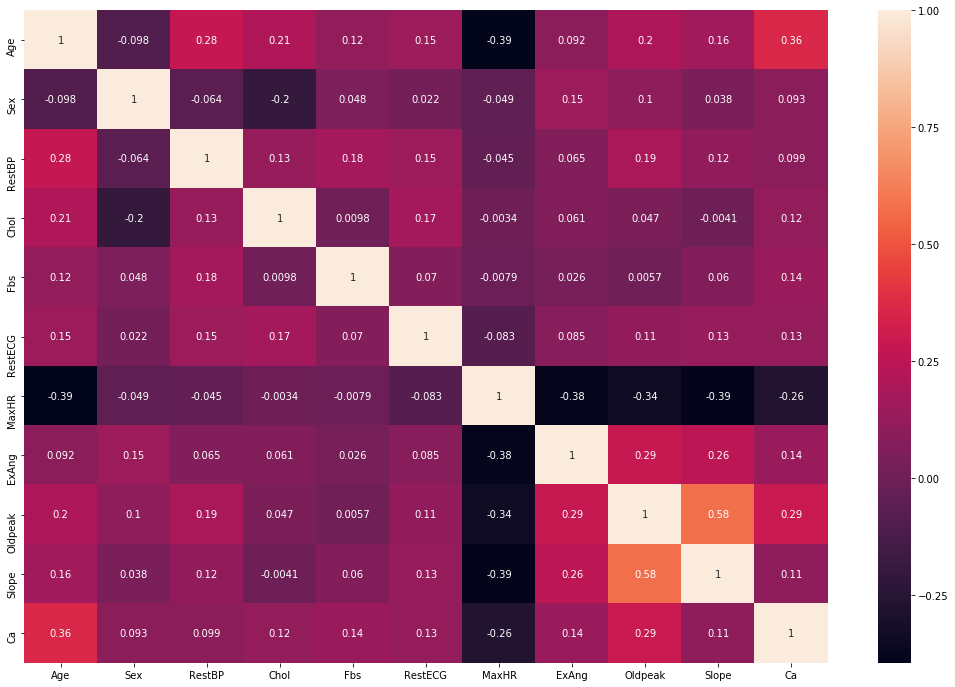

In [30]:
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches

sns.heatmap(newdataplt.corr(), annot = True, ax = ax)

In [31]:
heartdata.isnull().sum().sort_values()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
AHD          0
Thal         2
Ca           4
dtype: int64

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


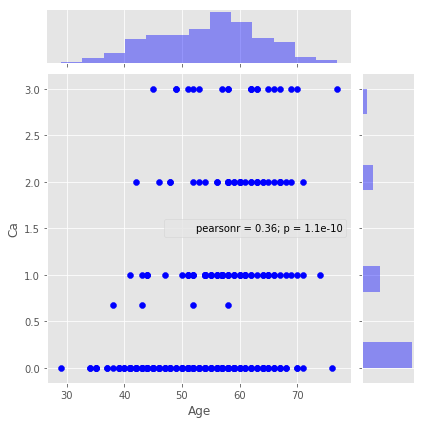

In [35]:
plt.style.use('ggplot')

sns.jointplot(newdata['Age'], newdata['Ca'], color = 'blue')

In [50]:
target = np.asarray(target, dtype = np.float64)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(newdata, target, test_size=0.2)

In [52]:
clf = RandomForestClassifier(n_estimators = 40, random_state = 101)

In [53]:
type(y_train)

numpy.ndarray

In [54]:
clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [55]:
y_pred=clf.predict(X_test)

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8688524590163934


In [57]:
chk = np.asarray(newdata, dtype = np.float64)

In [71]:
"""print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MSLE: ', metrics.mean_squared_log_error(y_test, y_pred))"""

"print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))\nprint('MSE: ', metrics.mean_squared_error(y_test, y_pred))\nprint('RMSE: ', sqrt(metrics.mean_squared_error(y_test, y_pred)))\nprint('MSLE: ', metrics.mean_squared_log_error(y_test, y_pred))"

In [77]:
mat = confusion_matrix(y_test, y_pred)

In [85]:
mat.T

array([[28,  2],
       [ 6, 25]], dtype=int64)

In [86]:
mat

array([[28,  6],
       [ 2, 25]], dtype=int64)

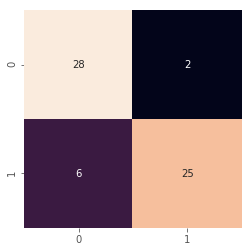

In [84]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

In [97]:
feature_imp = pd.Series(clf.feature_importances_,index = newdata.columns).sort_values(ascending=False)

In [99]:
feature_imp

MaxHR        0.137003
Ca           0.121497
Thal         0.115630
ChestPain    0.102607
Oldpeak      0.090667
Age          0.088967
RestBP       0.079347
ExAng        0.069469
Chol         0.068353
Slope        0.051366
Sex          0.041872
RestECG      0.022303
Fbs          0.010920
dtype: float64

No handles with labels found to put in legend.


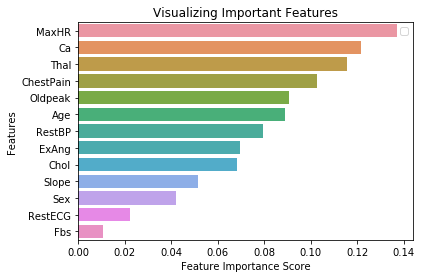

In [100]:
sns.barplot(x = feature_imp, y = feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()

In [61]:
data.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca'],
      dtype='object')

### Removing Fbs and RestECG

In [168]:
dataadj = newdata[['Age', 'RestBP', 'Chol', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'ChestPain', 'Fbs', 'RestECG']]

In [169]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataadj, target, test_size=0.2)

In [174]:
clf2 = RandomForestClassifier(n_estimators = 40, random_state = 42)

In [175]:
clf2.fit(X_train2,y_train2)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [176]:
y_pred2 = clf2.predict(X_test2)

In [177]:
print("Accuracy:", accuracy_score(y_test2, y_pred2))

Accuracy: 0.8360655737704918


In [ ]:
k

In [180]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# help(make_pipeline)

prediction = knn.predict(X_test)

print('knn accuracy: ', accuracy_score(y_test, prediction))

svc = SVC()

knn accuracy:  0.7868852459016393


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


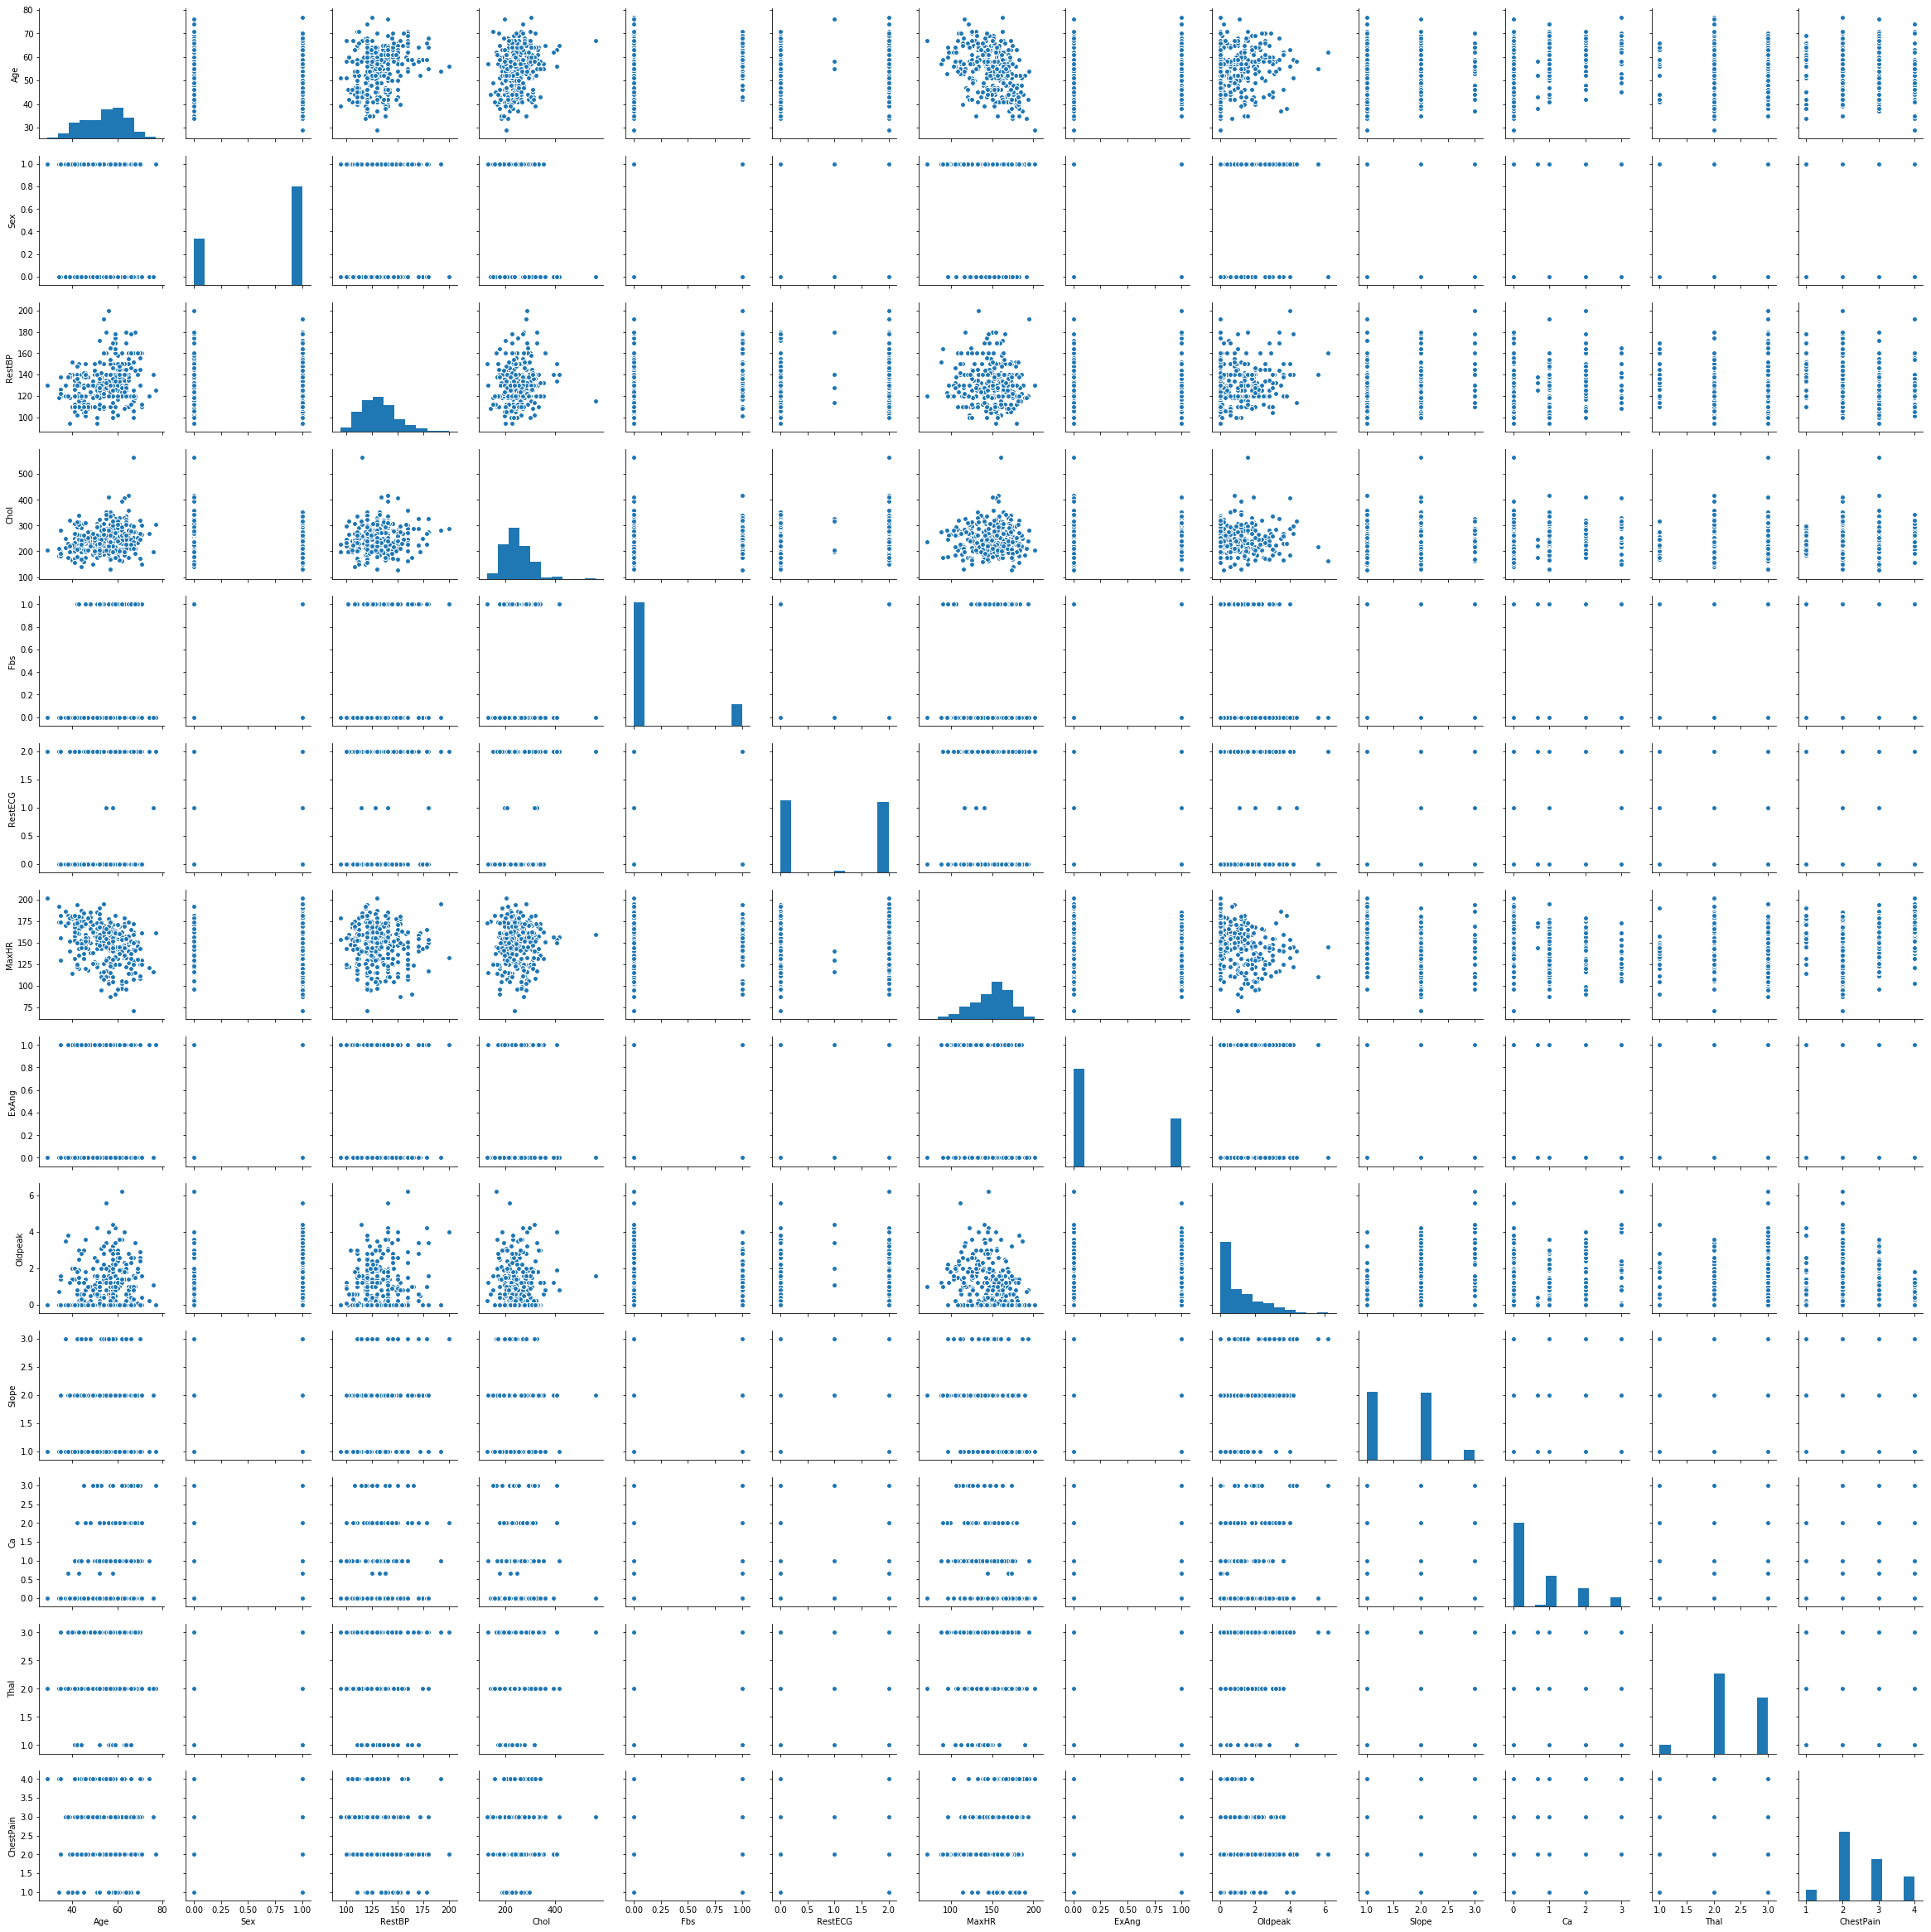

In [184]:
sns.pairplot(newdata)

In [186]:
newdata.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'Thal', 'ChestPain'],
      dtype='object')